# Importing Libraries:

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

### Setting display limit of rows and columns to max

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



### Importing data

In [27]:
data = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search.csv")

In [28]:
data2 = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search (2).csv")

In [29]:
data3 = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search (3).csv")

In [30]:
data4 = pd.read_csv("C:/Users/meher/Downloads/Untitled discover search (4).csv")

### Creating one Dataframe with combine data from all the csv's

In [31]:
main_df = pd.concat([data, data2, data3, data4], axis=0, ignore_index=True)


In [32]:
main_df.head(3)

@timestamp  @version  @version.keyword  \
0  Nov 29, 2023 @ 23:59:25.471         1                 1   
1  Nov 29, 2023 @ 23:59:08.972         1                 1   
2  Nov 29, 2023 @ 23:59:08.890         1                 1   

                    _id                                             _index  \
0  vLtXHIwBF6tnC93YzbTK  de-raw-data-intellicar-vehicle-response-v1-202...   
1  s7tXHIwBF6tnC93YjbRi  de-raw-data-euler-vehicle-response-v1-2023.11....   
2  srtXHIwBF6tnC93YjbRi  de-raw-data-euler-vehicle-response-v1-2023.11....   

  _score battery_current battery_remaining_capacity battery_soc battery_soh  \
0      -               -                          -           -           -   
1      -               0                          0         100       99.44   
2      -            -0.6                      149.1       99.89       99.53   

  battery_temperature battery_voltage                           bin  \
0                   -               -                             -   
1                20.2            82.1  034100123SS1721296LC9202G05B   
2                  27            82.1  013280423SS1721296LC9202G05B   

                    bin.keyword can_data.gear_state.timestamp  \
0                             -             1,701,276,907,356   
1  034100123SS1721296LC9202G05B                             -   
2  013280423SS1721296LC9202G05B                             -   

  can_data.gear_state.value can_data.odometer.timestamp  \
0                         0           1,701,276,907,356   
1                         -                           -   
2                         -                           -   

  can_data.odometer.value can_data.soc.timestamp can_data.soc.value  \
0                 7,051.5      1,701,276,907,356                 23   
1                       -                      -                  -   
2                       -                      -                  -   

  can_data.vehicle_speed.timestamp can_data.vehicle_speed.value  \
0                1,701,276,907,356                            0   
1                                -                            -   
2                                -                            -   

      chassis_number chassis_number.keyword display_name display_name.keyword  \
0                  -                      -            -                    -   
1  MD9EMHDL23A217004      MD9EMHDL23A217004            -                    -   
2  MD9EMHDL23D217406      MD9EMHDL23D217406            -                    -   

                                      event.original  \
0  {"can_data":{"ac":null,"battery_temperature_hi...   
1  {"battery_current":0.0,"battery_remaining_capa...   
2  {"battery_current":-0.6,"battery_remaining_cap...   

                              event.original.keyword  \
0  {"can_data":{"ac":null,"battery_temperature_hi...   
1  {"battery_current":0.0,"battery_remaining_capa...   
2  {"battery_current":-0.6,"battery_remaining_cap...   

                   geo_point_loc gps_data.alti  gps_data.commtime  \
0    POINT (77.069967 28.440128)           207  1,701,281,034,401   
1  POINT (77.2932116 28.5214233)             -                  -   
2  POINT (80.2461066 13.0547166)             -                  -   

  gps_data.devbattery gps_data.heading gps_data.ignstatus  \
0                4.07                0                off   
1                   -                -                  -   
2                   -                -                  -   

  gps_data.ignstatus.keyword gps_data.lat gps_data.lng gps_data.mobili  \
0                        off        28.44        77.07               0   
1                          -            -            -               -   
2                          -            -            -               -   

  gps_data.rxdbm gps_data.speed gps_data.vehbattery             imei  \
0             29              0               12.77                -   
1              -              -                   -  8669070590874

### Columns present in the data 

In [33]:
main_df.columns

Index(['@timestamp', '@version', '@version.keyword', '_id', '_index', '_score',
       'battery_current', 'battery_remaining_capacity', 'battery_soc',
       'battery_soh', 'battery_temperature', 'battery_voltage', 'bin',
       'bin.keyword', 'can_data.gear_state.timestamp',
       'can_data.gear_state.value', 'can_data.odometer.timestamp',
       'can_data.odometer.value', 'can_data.soc.timestamp',
       'can_data.soc.value', 'can_data.vehicle_speed.timestamp',
       'can_data.vehicle_speed.value', 'chassis_number',
       'chassis_number.keyword', 'display_name', 'display_name.keyword',
       'event.original', 'event.original.keyword', 'geo_point_loc',
       'gps_data.alti', 'gps_data.commtime', 'gps_data.devbattery',
       'gps_data.heading', 'gps_data.ignstatus', 'gps_data.ignstatus.keyword',
       'gps_data.lat', 'gps_data.lng', 'gps_data.mobili', 'gps_data.rxdbm',
       'gps_data.speed', 'gps_data.vehbattery', 'imei', 'imei.keyword',
       'latitude', 'latitude.keyword',

### Desired colums 

In [34]:
columns_required = [
    '_id',
    'battery_soc',
    'battery_soh',
    'chassis_number',
    'speed',
    'odometer',
    'vehicle_mode',
    'location',
    'location_last_updated_at',
    'battery_remaining_capacity',
    'battery_voltage',
    'battery_temperature',
    'registration_number'
]

df = main_df[columns_required]


In [35]:
df.head(10)

_id battery_soc battery_soh     chassis_number speed  \
0  vLtXHIwBF6tnC93YzbTK           -           -                  -     -   
1  s7tXHIwBF6tnC93YjbRi         100       99.44  MD9EMHDL23A217004     0   
2  srtXHIwBF6tnC93YjbRi       99.89       99.53  MD9EMHDL23D217406     0   
3  sbtXHIwBF6tnC93YjbRi       88.81       99.74  MD9EMHDL23D217028     0   
4  rLtXHIwBF6tnC93YjbQW       55.66         100  MD9EMHDL23D217338     0   
5  rbtXHIwBF6tnC93YjbQW       98.93         100  MD9EMHDL23D217334     0   
6  q7tXHIwBF6tnC93YjbQW         100       99.66  MD9EMHDL23D217048     0   
7  sLtXHIwBF6tnC93YjbRi         100       99.79  MD9EMHDL23D217043     0   
8  qrtXHIwBF6tnC93YjbQW       98.88       97.07  MD9EMHDL23D217373     0   
9  r7tXHIwBF6tnC93YjbRi         100        88.6  MD9EMHDL23D217359     0   

   odometer vehicle_mode                location     location_last_updated_at  \
0         -            -                       -                            -   
1  8,876.98            0  28.5214233, 77.2932116  Nov 29, 2023 @ 23:50:50.000   
2  2,466.43            2  13.0547166, 80.2461066  Nov 29, 2023 @ 23:58:00.000   
3  2,592.04            0   12.9391316, 80.137675  Nov 29, 2023 @ 23:52:32.000   
4  2,468.84            0    13.0548333, 80.24552  Nov 29, 2023 @ 23:31:41.000   
5  2,096.09            0  12.9400816, 80.1376283  Nov 29, 2023 @ 23:48:08.000   
6  3,742.79            0  13.0547683, 80.2460283  Nov 29, 2023 @ 23:57:55.000   
7  2,049.09            3    13.05474, 80.2460749  Nov 29, 2023 @ 23:58:00.000   
8  3,658.24            0      13.05462, 80.24609  Nov 29, 2023 @ 23:57:58.000   
9  2,176.74            0  13.0546466, 80.2461566  Nov 29, 2023 @ 23:57:58.000   

  battery_remaining_capacity battery_voltage battery_temperature  \
0                          -               -                   -   
1                          0            82.1                20.2   
2                      149.1            82.1                  27   
3                          0              80                27.6   
4                       70.8            75.1                  25   
5                      147.7              82                  27   
6                          0            81.9                28.8   
7                          0            82.3                29.8   
8                      126.3            81.8                  33   
9                      136.7            82.4                  26   

  registration_number  
0                   -  
1          DL51GD6472  
2          TN12AY6597  
3          TN12AY6557  
4          TN12AY6585  
5          TN12AY6571  
6          TN12AY6581  
7          TN12AY6514  
8          TN12AY6507  
9          TN12AY6561

## EDA

In [36]:
df = df.replace('-', np.nan)

# Drop rows containing NaN values
df = df.dropna()

In [37]:
df['location_last_updated_at'] = pd.to_datetime(df['location_last_updated_at'], format='%b %d, %Y @ %H:%M:%S.%f')


In [38]:
df['Date'] = df['location_last_updated_at'].dt.date
df['Time'] = df['location_last_updated_at'].dt.time


In [39]:
df.head(15)

_id battery_soc battery_soh     chassis_number speed  \
1   s7tXHIwBF6tnC93YjbRi         100       99.44  MD9EMHDL23A217004     0   
2   srtXHIwBF6tnC93YjbRi       99.89       99.53  MD9EMHDL23D217406     0   
3   sbtXHIwBF6tnC93YjbRi       88.81       99.74  MD9EMHDL23D217028     0   
4   rLtXHIwBF6tnC93YjbQW       55.66         100  MD9EMHDL23D217338     0   
5   rbtXHIwBF6tnC93YjbQW       98.93         100  MD9EMHDL23D217334     0   
6   q7tXHIwBF6tnC93YjbQW         100       99.66  MD9EMHDL23D217048     0   
7   sLtXHIwBF6tnC93YjbRi         100       99.79  MD9EMHDL23D217043     0   
8   qrtXHIwBF6tnC93YjbQW       98.88       97.07  MD9EMHDL23D217373     0   
9   r7tXHIwBF6tnC93YjbRi         100        88.6  MD9EMHDL23D217359     0   
10  qbtXHIwBF6tnC93YjbQW       91.83         100  MD9EMHDL23D217416     0   
11  rrtXHIwBF6tnC93YjbRi       99.68        97.8  MD9EMHDL23D217319     0   
82  FG1SHIwBtrqVYmbR9j2D         100       99.44  MD9EMHDL23A217004     0   
83  C21SHIwBtrqVYmbR9T36       88.81       99.74  MD9EMHDL23D217028     0   
84  Dm1SHIwBtrqVYmbR9T36       98.93         100  MD9EMHDL23D217334     0   
85  DW1SHIwBtrqVYmbR9T36        99.9       99.53  MD9EMHDL23D217406     0   

    odometer vehicle_mode                location location_last_updated_at  \
1   8,876.98            0  28.5214233, 77.2932116      2023-11-29 23:50:50   
2   2,466.43            2  13.0547166, 80.2461066      2023-11-29 23:58:00   
3   2,592.04            0   12.9391316, 80.137675      2023-11-29 23:52:32   
4   2,468.84            0    13.0548333, 80.24552      2023-11-29 23:31:41   
5   2,096.09            0  12.9400816, 80.1376283      2023-11-29 23:48:08   
6   3,742.79            0  13.0547683, 80.2460283      2023-11-29 23:57:55   
7   2,049.09            3    13.05474, 80.2460749      2023-11-29 23:58:00   
8   3,658.24            0      13.05462, 80.24609      2023-11-29 23:57:58   
9   2,176.74            0  13.0546466, 80.2461566      2023-11-29 23:57:58   
10  2,958.05            0  13.0546766, 80.2460749      2023-11-29 23:57:56   
11  2,121.97            1  12.9632849, 80.1324549      2023-11-29 23:57:58   
82  8,876.98            0  28.5214233, 77.2932116      2023-11-29 23:50:50   
83  2,592.04            0   12.9391316, 80.137675      2023-11-29 23:39:56   
84  2,096.09            0  12.9400816, 80.1376283      2023-11-29 23:48:08   
85  2,466.43            2  13.0547166, 80.2461066      2023-11-29 23:53:00   

   battery_remaining_capacity battery_voltage battery_temperature  \
1                           0            82.1                20.2   
2                       149.1            82.1                  27   
3                           0              80                27.6   
4                        70.8            75.1                  25   
5                       147.7              82                  27   
6                           0            81.9                28.8   
7                           0            82.3                29.8   
8                       126.3            81.8                  33   
9                       136.7            82.4                  26   
10                      129.5            80.8                  28   
11                      137.1            82.2                  30   
82                          0            82.1                20.2   
83                          0              80                27.6   
84                      147.7              82                  27   
85                      149.1            82.1                  27   

   registration_number        Date      Time  
1           DL51GD6472  2023-11-29  23:50:50  
2           TN12AY6597  2023-11-29  23:58:00  
3           TN12AY6557  2023-11-29  23:52:32  
4           TN12AY6585  2023-11-29  23:31:41  
5           TN12AY6571  2023-11-29  23:48:08  
6           TN12AY6581  2023-11-29  23:57:55  
7           TN12AY6514  2023-11-29  23:58:00  
8           TN12AY6507  2023-11-29  23:57:58  
9          

In [40]:
df = df.drop(columns='registration_number')

In [41]:
df = df.drop(columns='location')

In [42]:
float_columns = ['battery_soc', 'battery_soh']
df[float_columns] = df[float_columns].astype(float)
df['odometer'] = df['odometer'].str.replace(',', '').astype(float)


In [43]:
df['battery_remaining_capacity']=df['battery_remaining_capacity'].astype(float)

In [44]:
df['speed'] = df['speed'].astype(float)

In [45]:
df['vehicle_mode'] = df['vehicle_mode'].astype(float)

In [46]:
df.dtypes

_id                                   object
battery_soc                          float64
battery_soh                          float64
chassis_number                        object
speed                                float64
odometer                             float64
vehicle_mode                         float64
location_last_updated_at      datetime64[ns]
battery_remaining_capacity           float64
battery_voltage                       object
battery_temperature                   object
Date                                  object
Time                                  object
dtype: object

In [23]:
df['chassis_number'].value_counts()

MD9EMHDL23D217406    930
MD9EMHDL23D217028    930
MD9EMHDL23D217338    930
MD9EMHDL23D217334    930
MD9EMHDL23D217048    930
MD9EMHDL23D217043    930
MD9EMHDL23D217373    930
MD9EMHDL23D217359    930
MD9EMHDL23D217416    930
MD9EMHDL23D217319    930
MD9EMHDL23A217004    729
Name: chassis_number, dtype: int64

In [48]:
df.dtypes

_id                                   object
battery_soc                          float64
battery_soh                          float64
chassis_number                        object
speed                                float64
odometer                             float64
vehicle_mode                         float64
location_last_updated_at      datetime64[ns]
battery_remaining_capacity           float64
battery_voltage                       object
battery_temperature                   object
Date                                  object
Time                                  object
dtype: object

In [50]:
veh1 = df[df['chassis_number'] == 'MD9EMHDL23D217028']
veh2 = df[df['chassis_number'] == 'MD9EMHDL23D217406']
veh3 = df[df['chassis_number'] == 'MD9EMHDL23D217334']
veh4 = df[df['chassis_number'] == 'MD9EMHDL23D217359']
veh5 = df[df['chassis_number'] == 'MD9EMHDL23D217043']
veh6 = df[df['chassis_number'] == 'MD9EMHDL23D217048']
veh7 = df[df['chassis_number'] == 'MD9EMHDL23D217338']
veh8 = df[df['chassis_number'] == 'MD9EMHDL23D217416']
veh9 = df[df['chassis_number'] == 'MD9EMHDL23D217373']
veh10 = df[df['chassis_number'] == 'MD9EMHDL23D217319']
veh11 = df[df['chassis_number'] == 'MD9EMHDL23A217004']


## Analysis and Prediction for vehicle3

used vehicle 3 as it has more balanced range of Soc and odometer compared to other vehicles 

## Vehicle 3 

In [51]:
veh3['Date'].value_counts()

2023-11-28    293
2023-11-27    286
2023-11-29    276
2023-11-30     74
2023-11-26      1
Name: Date, dtype: int64

## Calculating the distance travelled since the last update for the vehicle

In [136]:
veh3['distance_since_last_update'] = veh3.groupby('chassis_number')['odometer'].diff().fillna(0)


C:\Users\meher\AppData\Local\Temp\ipykernel_40660\1324507635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh3['distance_since_last_update'] = veh3.groupby('chassis_number')['odometer'].diff().fillna(0)


In [137]:
veh3['distance_since_last_update'] = veh3['distance_since_last_update'].abs()


C:\Users\meher\AppData\Local\Temp\ipykernel_40660\3355023434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh3['distance_since_last_update'] = veh3['distance_since_last_update'].abs()


In [138]:
veh3

_id  battery_soc  battery_soh     chassis_number  \
5      rbtXHIwBF6tnC93YjbQW        98.93        100.0  MD9EMHDL23D217334   
84     Dm1SHIwBtrqVYmbR9T36        98.93        100.0  MD9EMHDL23D217334   
166    sLtOHIwBF6tnC93YXrLj        98.93        100.0  MD9EMHDL23D217334   
249    tm1JHIwBtrqVYmbRxwmC        98.93        100.0  MD9EMHDL23D217334   
332    qLtFHIwBF6tnC93YMbAz        98.93        100.0  MD9EMHDL23D217334   
412    ImxAHIwBtrqVYmbRmdZG        98.94        100.0  MD9EMHDL23D217334   
499    IGw8HIwBtrqVYmbRAbys        98.94        100.0  MD9EMHDL23D217334   
573    xbs3HIwBF6tnC93Ya62X        98.94        100.0  MD9EMHDL23D217334   
654    eWwyHIwBtrqVYmbR1IhF        98.94        100.0  MD9EMHDL23D217334   
742    87suHIwBF6tnC93YOav9        98.94        100.0  MD9EMHDL23D217334   
818    -mwpHIwBtrqVYmbRoVMD        98.94        100.0  MD9EMHDL23D217334   
897    QLslHIwBF6tnC93YCaqQ        98.94        100.0  MD9EMHDL23D217334   
976    bLsgHIwBF6tnC93Yc6lO        98.94        100.0  MD9EMHDL23D217334   
1061   WGwbHIwBtrqVYmbR3QVB        98.94        100.0  MD9EMHDL23D217334   
1139   ymsXHIwBtrqVYmbRR-pL        98.94        100.0  MD9EMHDL23D217334   
1226   SmsSHIwBtrqVYmbRrtAJ        98.94        100.0  MD9EMHDL23D217334   
1298   ZWsOHIwBtrqVYmbRF7Vf        98.94        100.0  MD9EMHDL23D217334   
1382   eWsKHIwBtrqVYmbRP5l8        98.94        100.0  MD9EMHDL23D217334   
1459   KWsKHIwBtrqVYmbRP5l8        98.94        100.0  MD9EMHDL23D217334   
1567   _WQAHIwBzfKwQuuqSup9        98.94        100.0  MD9EMHDL23D217334   
1648   Mgr-G4wBvj1iYEGSL0Yy        98.94        100.0  MD9EMHDL23D217334   
1733   9O_3G4wBOI7DHfriHrJH        98.94        100.0  MD9EMHDL23D217334   
1812   Je_yG4wBOI7DHfriiKQs        98.94        100.0  MD9EMHDL23D217334   
1894   esnxG4wBX8F0ywSu5crB        98.94        100.0  MD9EMHDL23D217334   
2036   dsnpG4wBX8F0ywSuRsnN        98.94        100.0  MD9EMHDL23D217334   
2115   zMnkG4wBX8F0ywSusMiJ        98.94        100.0  MD9EMHDL23D217334   
2197   FsngG4wBX8F0ywSuGMiU        98.94        100.0  MD9EMHDL23D217334   
2277   dejbG4wBKEv2xgbPgCza        98.94        100.0  MD9EMHDL23D217334   
2358   GujWG4wBKEv2xgbP6RKM        98.94        100.0  MD9EMHDL23D217334   
2439   iOfSG4wBKEv2xgbPU_ju        98.94        100.0  MD9EMHDL23D217334   
2523   s-fNG4wBKEv2xgbPut7Y        98.94        100.0  MD9EMHDL23D217334   
2605   0ufJG4wBKEv2xgbPJMRt        98.94        100.0  MD9EMHDL23D217334   
2681   LcnEG4wBX8F0ywSujsRp        98.94        100.0  MD9EMHDL23D217334   
2763   jue_G4wBKEv2xgbP9JD6        98.95        100.0  MD9EMHDL23D217334   
2844   2Mm7G4wBX8F0ywSuXcJ9        98.95        100.0  MD9EMHDL23D217334   
2927   Cee2G4wBKEv2xgbPxl3L        98.95        100.0  MD9EMHDL23D217334   
3007   b8myG4wBX8F0ywSuMME4        98.95        100.0  MD9EMHDL23D217334   
3086   3MmtG4wBX8F0ywSumMBB        98.95        100.0  MD9EMHDL23D217334   
3166   Q8mpG4wBX8F0ywSuAMD_        98.95        100.0  MD9EMHDL23D217334   
3253   ismkG4wBX8F0ywSuZ78u        98.95        100.0  MD9EMHDL23D217334   
3332   o-afG4wBKEv2xgbP0Nry        98.95        100.0  MD9EMHDL23D217334   
3415   pOabG4wBKEv2xgbPOsDu        98.95        100.0  MD9EMHDL23D217334   
3493   bsmWG4wBX8F0ywSuor1Z        98.95        100.0  MD9EMHDL23D217334   
3574   9OaSG4wBKEv2xgbPDIyK        98.95        100.0  MD9EMHDL23D217334   
3662   -eaNG4wBKEv2xgbPdHK8        98.95        100.0  MD9EMHDL23D217334   
3735   a8mIG4wBX8F0ywSu27vh        98.95        100.0  MD9EMHDL23D217334   
3821   osmEG4wBX8F0ywSuRboF        98.95        100.0  MD9EMHDL23D217334   
3905   DOZ_G4wBKEv2xgbPrCTx        98.95        100.0  MD9EMHDL23D217334   
3981   9-Z7G4wBKEv2xgbPFQkj        98.95        100.0  MD9EMHDL23D217334   
4064   osl2G4wBX8F0ywSufbiS        98.95        100.0  MD9EMHDL23D217334   
4143   leVxG4wBKEv2xgbP5dWR        98.95        100.0  MD9EMHDL23D217334   
4227   9MltG4wBX8F0ywSuTra9        98.95        100.0  MD9EMHDL23D217334

##   Exploring Co-relation between Columns

In [65]:
correlation_data = veh3.corr()

C:\Users\meher\AppData\Local\Temp\ipykernel_40704\3980281182.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = veh3.corr()


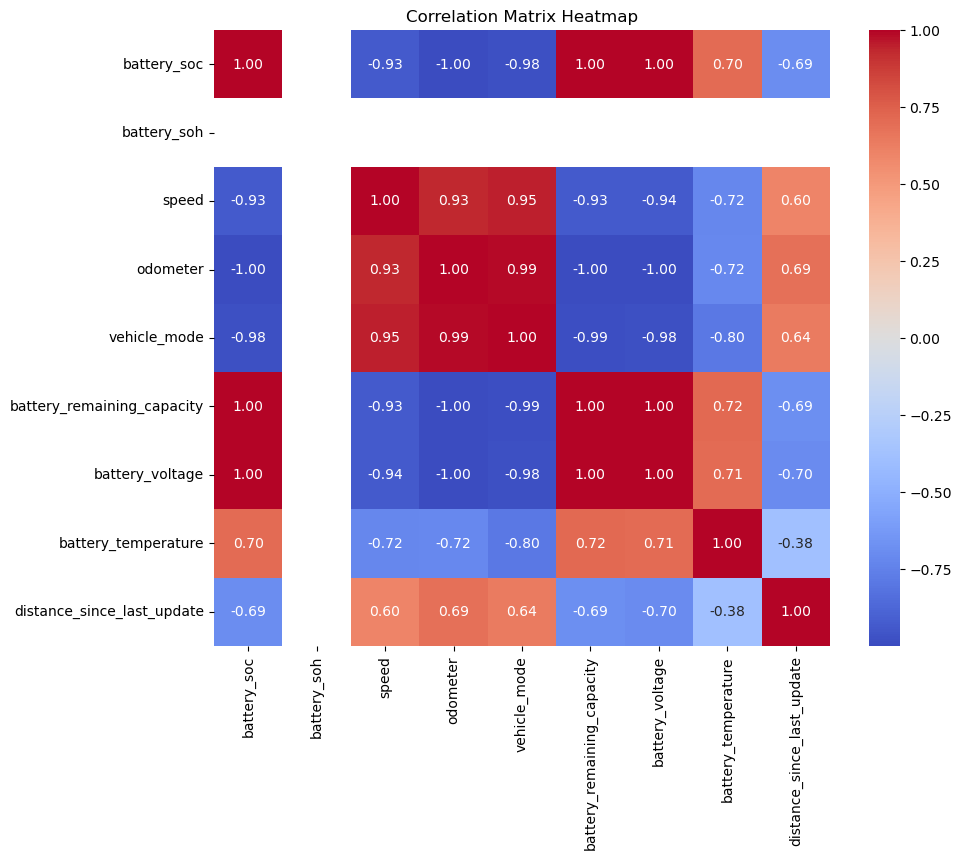

In [66]:
correlation_data.fillna(0, inplace=True)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Finding Range based on odometer readings

In [34]:
veh3['battery_soc'].value_counts().sort_index()

2.72      1
6.09      1
9.79      1
11.26     1
12.14     1
12.25     1
14.56     1
14.61     1
15.52     1
16.15     1
16.46     1
19.15     1
24.25     1
28.65     1
28.94     1
29.03     1
33.34     1
34.59     1
36.17     1
36.26     1
37.92     1
41.44     1
45.05     1
49.00     1
50.22     1
54.01     1
58.90     1
59.44     1
59.92     1
60.52     1
60.82     1
61.07     1
61.10     1
61.24     1
62.59     1
62.65     1
62.83     1
64.49     2
64.75     1
65.04     2
65.10     1
65.15     1
65.17     1
65.18     1
65.41     1
66.60     1
66.83     1
67.12     1
67.23     1
68.76     1
68.86     1
69.46     1
69.96     1
70.31     1
70.48     1
70.56     1
70.79     1
71.00     1
71.54     1
71.77     1
71.94     1
77.19     1
78.59     1
78.88     1
79.17     1
79.48     1
81.64     1
81.91     1
82.06     1
82.12     1
82.84     1
84.28     1
98.93    18
98.94    28
98.95    55
99.01    11
99.02    24
99.03    14
99.04    27
99.05    15
99.06    14
99.07    14
99.08    14
99.0

In [99]:
maxSoc = veh3[veh3['battery_soc'] == 99.43]


In [100]:
maxSoc

_id  battery_soc  battery_soh     chassis_number  \
74874  AE_mDIwB_FSTivgZTrMD        99.43        100.0  MD9EMHDL23D217334   

       speed  odometer  vehicle_mode location_last_updated_at  \
74874    0.0   2096.08           0.0      2023-11-26 23:54:41   

       battery_remaining_capacity  battery_voltage  battery_temperature  \
74874                       147.8             82.1                 28.0   

             Date      Time  distance_since_last_update  Remaining km  
74874  2023-11-26  23:54:41                         0.0       61.6466

In [101]:
veh3['battery_soc'].min()

2.72

In [102]:
minSoc = veh3[veh3['battery_soc'] == 2.72]
minSoc

_id  battery_soc  battery_soh     chassis_number  \
23184  mYl9IYwBtrqVYmbREYQH         2.72        100.0  MD9EMHDL23D217334   

       speed  odometer  vehicle_mode location_last_updated_at  \
23184   11.0   2158.67           3.0      2023-11-30 23:56:58   

       battery_remaining_capacity  battery_voltage  battery_temperature  \
23184                        17.7             65.1                 30.0   

             Date      Time  distance_since_last_update  Remaining km  
23184  2023-11-30  23:56:58                       62.59        1.6864

range = odometer_max reading - odometer_min reading 


2158.67-2096.08	= 62 

In [59]:
veh3['Remaining km'] = veh3['battery_soc'] * 62


C:\Users\meher\AppData\Local\Temp\ipykernel_40660\2870303450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh3['Remaining km'] = veh3['battery_soc'] * 62


In [60]:
veh3.tail()

_id  battery_soc  battery_soh     chassis_number  \
74553  llD4DIwB_FSTivgZrBpC        99.41        100.0  MD9EMHDL23D217334   
74632  SlD0DIwB_FSTivgZFADk        99.41        100.0  MD9EMHDL23D217334   
74719  l0_vDIwB_FSTivgZfeYQ        99.41        100.0  MD9EMHDL23D217334   
74793  0k_qDIwB_FSTivgZ5czI        99.41        100.0  MD9EMHDL23D217334   
74874  AE_mDIwB_FSTivgZTrMD        99.43        100.0  MD9EMHDL23D217334   

       speed  odometer  vehicle_mode location_last_updated_at  \
74553    0.0   2096.08           0.0      2023-11-27 00:20:50   
74632    0.0   2096.08           0.0      2023-11-27 00:15:33   
74719    0.0   2096.08           0.0      2023-11-27 00:10:56   
74793    0.0   2096.08           0.0      2023-11-27 00:05:00   
74874    0.0   2096.08           0.0      2023-11-26 23:54:41   

       battery_remaining_capacity battery_voltage battery_temperature  \
74553                       147.8            82.1                  28   
74632                       147.8            82.1                  28   
74719                       147.8            82.1                  28   
74793                       147.8            82.1                  28   
74874                       147.8            82.1                  28   

             Date      Time  Remaining km  
74553  2023-11-27  00:20:50       6163.42  
74632  2023-11-27  00:15:33       6163.42  
74719  2023-11-27  00:10:56       6163.42  
74793  2023-11-27  00:05:00       6163.42  
74874  2023-11-26  23:54:41       6164.66

In [49]:
veh3.columns

Index(['_id', 'battery_soc', 'battery_soh', 'chassis_number', 'speed',
       'odometer', 'vehicle_mode', 'location_last_updated_at',
       'battery_remaining_capacity', 'battery_voltage', 'battery_temperature',
       'Date', 'Time'],
      dtype='object')

## # Average Soc for each day

In [61]:

avg_soc_per_date = veh3.groupby('Date')['battery_soc'].mean().reset_index()


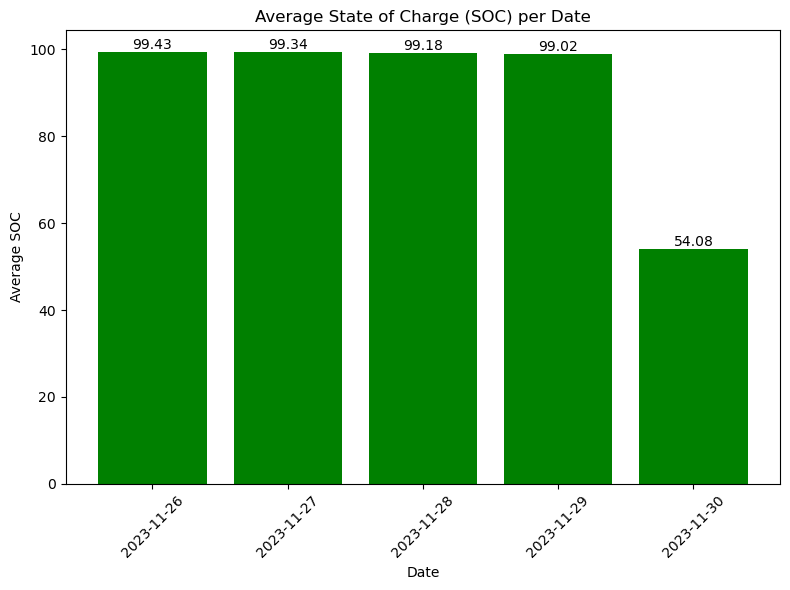

In [62]:
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_soc_per_date['Date'], avg_soc_per_date['battery_soc'], color='green')


for bar, value in zip(bars, avg_soc_per_date['battery_soc']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

plt.xlabel('Date')
plt.ylabel('Average SOC')
plt.title('Average State of Charge (SOC) per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Rate of energy consumption :

In [63]:
starting_battery_capacity = 99.43  # Battery SOC at the start
ending_battery_capacity = 2.72  # Battery SOC at the end
starting_odometer_reading = 2096  # Odometer reading at the start
ending_odometer_reading = 2158.67  # Odometer reading at the end


distance_traveled = abs(ending_odometer_reading - starting_odometer_reading)


energy_consumed = starting_battery_capacity - ending_battery_capacity


energy_consumption_rate = energy_consumed / distance_traveled

print(f"The rate of energy consumption is approximately {energy_consumption_rate:.2f} kWh per kilometer.")


The rate of energy consumption is approximately 1.54 kWh per kilometer.


## Model Training

In [64]:
veh3

_id  battery_soc  battery_soh     chassis_number  \
5      rbtXHIwBF6tnC93YjbQW        98.93        100.0  MD9EMHDL23D217334   
84     Dm1SHIwBtrqVYmbR9T36        98.93        100.0  MD9EMHDL23D217334   
166    sLtOHIwBF6tnC93YXrLj        98.93        100.0  MD9EMHDL23D217334   
249    tm1JHIwBtrqVYmbRxwmC        98.93        100.0  MD9EMHDL23D217334   
332    qLtFHIwBF6tnC93YMbAz        98.93        100.0  MD9EMHDL23D217334   
412    ImxAHIwBtrqVYmbRmdZG        98.94        100.0  MD9EMHDL23D217334   
499    IGw8HIwBtrqVYmbRAbys        98.94        100.0  MD9EMHDL23D217334   
573    xbs3HIwBF6tnC93Ya62X        98.94        100.0  MD9EMHDL23D217334   
654    eWwyHIwBtrqVYmbR1IhF        98.94        100.0  MD9EMHDL23D217334   
742    87suHIwBF6tnC93YOav9        98.94        100.0  MD9EMHDL23D217334   
818    -mwpHIwBtrqVYmbRoVMD        98.94        100.0  MD9EMHDL23D217334   
897    QLslHIwBF6tnC93YCaqQ        98.94        100.0  MD9EMHDL23D217334   
976    bLsgHIwBF6tnC93Yc6lO        98.94        100.0  MD9EMHDL23D217334   
1061   WGwbHIwBtrqVYmbR3QVB        98.94        100.0  MD9EMHDL23D217334   
1139   ymsXHIwBtrqVYmbRR-pL        98.94        100.0  MD9EMHDL23D217334   
1226   SmsSHIwBtrqVYmbRrtAJ        98.94        100.0  MD9EMHDL23D217334   
1298   ZWsOHIwBtrqVYmbRF7Vf        98.94        100.0  MD9EMHDL23D217334   
1382   eWsKHIwBtrqVYmbRP5l8        98.94        100.0  MD9EMHDL23D217334   
1459   KWsKHIwBtrqVYmbRP5l8        98.94        100.0  MD9EMHDL23D217334   
1567   _WQAHIwBzfKwQuuqSup9        98.94        100.0  MD9EMHDL23D217334   
1648   Mgr-G4wBvj1iYEGSL0Yy        98.94        100.0  MD9EMHDL23D217334   
1733   9O_3G4wBOI7DHfriHrJH        98.94        100.0  MD9EMHDL23D217334   
1812   Je_yG4wBOI7DHfriiKQs        98.94        100.0  MD9EMHDL23D217334   
1894   esnxG4wBX8F0ywSu5crB        98.94        100.0  MD9EMHDL23D217334   
2036   dsnpG4wBX8F0ywSuRsnN        98.94        100.0  MD9EMHDL23D217334   
2115   zMnkG4wBX8F0ywSusMiJ        98.94        100.0  MD9EMHDL23D217334   
2197   FsngG4wBX8F0ywSuGMiU        98.94        100.0  MD9EMHDL23D217334   
2277   dejbG4wBKEv2xgbPgCza        98.94        100.0  MD9EMHDL23D217334   
2358   GujWG4wBKEv2xgbP6RKM        98.94        100.0  MD9EMHDL23D217334   
2439   iOfSG4wBKEv2xgbPU_ju        98.94        100.0  MD9EMHDL23D217334   
2523   s-fNG4wBKEv2xgbPut7Y        98.94        100.0  MD9EMHDL23D217334   
2605   0ufJG4wBKEv2xgbPJMRt        98.94        100.0  MD9EMHDL23D217334   
2681   LcnEG4wBX8F0ywSujsRp        98.94        100.0  MD9EMHDL23D217334   
2763   jue_G4wBKEv2xgbP9JD6        98.95        100.0  MD9EMHDL23D217334   
2844   2Mm7G4wBX8F0ywSuXcJ9        98.95        100.0  MD9EMHDL23D217334   
2927   Cee2G4wBKEv2xgbPxl3L        98.95        100.0  MD9EMHDL23D217334   
3007   b8myG4wBX8F0ywSuMME4        98.95        100.0  MD9EMHDL23D217334   
3086   3MmtG4wBX8F0ywSumMBB        98.95        100.0  MD9EMHDL23D217334   
3166   Q8mpG4wBX8F0ywSuAMD_        98.95        100.0  MD9EMHDL23D217334   
3253   ismkG4wBX8F0ywSuZ78u        98.95        100.0  MD9EMHDL23D217334   
3332   o-afG4wBKEv2xgbP0Nry        98.95        100.0  MD9EMHDL23D217334   
3415   pOabG4wBKEv2xgbPOsDu        98.95        100.0  MD9EMHDL23D217334   
3493   bsmWG4wBX8F0ywSuor1Z        98.95        100.0  MD9EMHDL23D217334   
3574   9OaSG4wBKEv2xgbPDIyK        98.95        100.0  MD9EMHDL23D217334   
3662   -eaNG4wBKEv2xgbPdHK8        98.95        100.0  MD9EMHDL23D217334   
3735   a8mIG4wBX8F0ywSu27vh        98.95        100.0  MD9EMHDL23D217334   
3821   osmEG4wBX8F0ywSuRboF        98.95        100.0  MD9EMHDL23D217334   
3905   DOZ_G4wBKEv2xgbPrCTx        98.95        100.0  MD9EMHDL23D217334   
3981   9-Z7G4wBKEv2xgbPFQkj        98.95        100.0  MD9EMHDL23D217334   
4064   osl2G4wBX8F0ywSufbiS        98.95        100.0  MD9EMHDL23D217334   
4143   leVxG4wBKEv2xgbP5dWR        98.95        100.0  MD9EMHDL23D217334   
4227   9MltG4wBX8F0ywSuTra9        98.95        100.0  MD9EMHDL23D217334

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
X1 = veh3[['battery_soc']]


In [87]:
y1 = veh3[['Remaining km']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [91]:
def calculate_and_add_remaining_km_column(dataframe):
    # Calculate 'Remaining km' based on 'battery_soc' * 62 for each row
    dataframe['Remaining km'] = dataframe['battery_soc'] * 62
    return dataframe



In [141]:
y_pred = model.predict(X_test)

In [145]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('r2 is : ', r2)
print('mse is : ', mse)

r2 is :  1.0
mse is :  3.506779535303615e-24


##  Creating Functions for Recursion purpose

In [139]:
def calculate_and_add_remaining_km_column(dataframe):
   
    dataframe['Remaining km'] = dataframe['battery_soc'] * 62
    return dataframe



In [92]:
calculate_and_add_remaining_km_column(veh4)

C:\Users\meher\AppData\Local\Temp\ipykernel_40660\1071693748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Remaining km'] = dataframe['battery_soc'] * 62


_id  battery_soc  battery_soh     chassis_number  \
9      r7tXHIwBF6tnC93YjbRi       100.00         88.6  MD9EMHDL23D217359   
92     CG1SHIwBtrqVYmbR9T36       100.00         88.6  MD9EMHDL23D217359   
167    qbtOHIwBF6tnC93YXrLj       100.00         88.6  MD9EMHDL23D217359   
253    tG1JHIwBtrqVYmbRxwmC       100.00         88.6  MD9EMHDL23D217359   
336    obtFHIwBF6tnC93YMbAz       100.00         88.6  MD9EMHDL23D217359   
410    HGxAHIwBtrqVYmbRmdZG       100.00         88.6  MD9EMHDL23D217359   
496    GWw8HIwBtrqVYmbRAbys       100.00         88.6  MD9EMHDL23D217359   
578    wbs3HIwBF6tnC93Ya62X       100.00         88.6  MD9EMHDL23D217359   
657    gWwyHIwBtrqVYmbR1Iin       100.00         88.6  MD9EMHDL23D217359   
740    77suHIwBF6tnC93YOav9       100.00         88.6  MD9EMHDL23D217359   
823    E7spHIwBF6tnC93YoasG       100.00         88.6  MD9EMHDL23D217359   
901    ObslHIwBF6tnC93YCaqQ       100.00         88.6  MD9EMHDL23D217359   
979    ZbsgHIwBF6tnC93Yc6lO       100.00         88.6  MD9EMHDL23D217359   
1066   UmwbHIwBtrqVYmbR3QVB       100.00         88.6  MD9EMHDL23D217359   
1145   w2sXHIwBtrqVYmbRR-pL       100.00         88.6  MD9EMHDL23D217359   
1221   Q2sSHIwBtrqVYmbRrtAJ       100.00         88.6  MD9EMHDL23D217359   
1305   sbsOHIwBF6tnC93YF6Vx       100.00         88.6  MD9EMHDL23D217359   
1387   cmsKHIwBtrqVYmbRP5l8       100.00         88.6  MD9EMHDL23D217359   
1463   ImsKHIwBtrqVYmbRP5l0       100.00         88.6  MD9EMHDL23D217359   
1571   _2QAHIwBzfKwQuuqSuq_       100.00         88.6  MD9EMHDL23D217359   
1653   Kwr-G4wBvj1iYEGSL0Yx       100.00         88.6  MD9EMHDL23D217359   
1736   9u_3G4wBOI7DHfriHrKb       100.00         88.6  MD9EMHDL23D217359   
1813   Hu_yG4wBOI7DHfriiKQs       100.00         88.6  MD9EMHDL23D217359   
1898   c8nxG4wBX8F0ywSu5crB       100.00         88.6  MD9EMHDL23D217359   
2041   K-jpG4wBKEv2xgbPRnrM       100.00         88.6  MD9EMHDL23D217359   
2120   xsnkG4wBX8F0ywSusMiJ       100.00         88.6  MD9EMHDL23D217359   
2203   QujgG4wBKEv2xgbPGEaj       100.00         88.6  MD9EMHDL23D217359   
2283   OMnbG4wBX8F0ywSugMfH       100.00         88.6  MD9EMHDL23D217359   
2364   hcnWG4wBX8F0ywSu6caK       100.00         88.6  MD9EMHDL23D217359   
2441   gOfSG4wBKEv2xgbPU_ii       100.00         88.6  MD9EMHDL23D217359   
2526   RMnNG4wBX8F0ywSuusXH       100.00         88.6  MD9EMHDL23D217359   
2606   vcnJG4wBX8F0ywSuJMRy       100.00         88.6  MD9EMHDL23D217359   
2690   MMnEG4wBX8F0ywSujsSV       100.00         88.6  MD9EMHDL23D217359   
2769   i8m_G4wBX8F0ywSu9MP5       100.00         88.6  MD9EMHDL23D217359   
2849   0sm7G4wBX8F0ywSuXcJ9       100.00         88.6  MD9EMHDL23D217359   
2932   Aee2G4wBKEv2xgbPxl1m       100.00         88.6  MD9EMHDL23D217359   
3013   ccmyG4wBX8F0ywSuMMF1       100.00         88.6  MD9EMHDL23D217359   
3094   3smtG4wBX8F0ywSumMB-       100.00         88.6  MD9EMHDL23D217359   
3170   PMmpG4wBX8F0ywSuAMD_       100.00         88.6  MD9EMHDL23D217359   
3255   kcmkG4wBX8F0ywSuZ7-l       100.00         88.6  MD9EMHDL23D217359   
3334   nuafG4wBKEv2xgbP0Nry       100.00         88.6  MD9EMHDL23D217359   
3410   nOabG4wBKEv2xgbPOsCl       100.00         88.6  MD9EMHDL23D217359   
3498   tuaWG4wBKEv2xgbPoqZg       100.00         88.6  MD9EMHDL23D217359   
3580   7OaSG4wBKEv2xgbPDIxJ       100.00         88.6  MD9EMHDL23D217359   
3658   8-aNG4wBKEv2xgbPdHK8       100.00         88.6  MD9EMHDL23D217359   
3741   Z8mIG4wBX8F0ywSu27vh       100.00         88.6  MD9EMHDL23D217359   
3822   m8mEG4wBX8F0ywSuRboF       100.00         88.6  MD9EMHDL23D217359   
3897   5Ml_G4wBX8F0ywSurLny       100.00         88.6  MD9EMHDL23D217359   
3984   -eZ7G4wBKEv2xgbPFQmF       100.00         88.6  MD9EMHDL23D217359   
4066   nsl2G4wBX8F0ywSufbiS       100.00         88.6  MD9EMHDL23D217359   
4148   kOVxG4wBKEv2xgbP5dWR       100.00         88.6  MD9EMHDL23D217359   
4222   9sltG4wBX8F0ywSuTrb7       100.00         88.6  MD9EMHDL23D217359

In [101]:
X1 = veh4[['battery_soc']]

In [102]:
y1 = veh4[['Remaining km']]

In [109]:
veh4pred = train_and_predict(X1,y1)

C:\Users\meher\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
calculate_and_add_remaining_km_column(veh5)

C:\Users\meher\AppData\Local\Temp\ipykernel_40660\1071693748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Remaining km'] = dataframe['battery_soc'] * 62


_id  battery_soc  battery_soh     chassis_number  \
7      sLtXHIwBF6tnC93YjbRi       100.00        99.79  MD9EMHDL23D217043   
88     qLtSHIwBF6tnC93Y9bPt       100.00        99.79  MD9EMHDL23D217043   
165    q7tOHIwBF6tnC93YXrLj       100.00        99.79  MD9EMHDL23D217043   
246    tW1JHIwBtrqVYmbRxwmC       100.00        99.79  MD9EMHDL23D217043   
329    o7tFHIwBF6tnC93YMbAz       100.00        99.79  MD9EMHDL23D217043   
408    HmxAHIwBtrqVYmbRmdZG       100.00        99.79  MD9EMHDL23D217043   
491    G2w8HIwBtrqVYmbRAbys       100.00        99.79  MD9EMHDL23D217043   
575    wrs3HIwBF6tnC93Ya62X       100.00        99.79  MD9EMHDL23D217043   
658    gmwyHIwBtrqVYmbR1Iin       100.00        99.79  MD9EMHDL23D217043   
733    8LsuHIwBF6tnC93YOav9       100.00        99.79  MD9EMHDL23D217043   
814    FLspHIwBF6tnC93YoasG       100.00        99.79  MD9EMHDL23D217043   
898    O7slHIwBF6tnC93YCaqQ       100.00        99.79  MD9EMHDL23D217043   
978    Z7sgHIwBF6tnC93Yc6lO       100.00        99.79  MD9EMHDL23D217043   
1057   U2wbHIwBtrqVYmbR3QVB       100.00        99.79  MD9EMHDL23D217043   
1142   xWsXHIwBtrqVYmbRR-pL       100.00        99.79  MD9EMHDL23D217043   
1223   RWsSHIwBtrqVYmbRrtAJ       100.00        99.79  MD9EMHDL23D217043   
1302   srsOHIwBF6tnC93YF6Vx       100.00        99.79  MD9EMHDL23D217043   
1385   dGsKHIwBtrqVYmbRP5l8       100.00        99.79  MD9EMHDL23D217043   
1466   JGsKHIwBtrqVYmbRP5l1       100.00        99.79  MD9EMHDL23D217043   
1575   -WQAHIwBzfKwQuuqSup9       100.00        99.79  MD9EMHDL23D217043   
1655   LQr-G4wBvj1iYEGSL0Yy       100.00        99.79  MD9EMHDL23D217043   
1737   9-_3G4wBOI7DHfriHrKb       100.00        99.79  MD9EMHDL23D217043   
1811   IO_yG4wBOI7DHfriiKQs       100.00        99.79  MD9EMHDL23D217043   
1891   dcnxG4wBX8F0ywSu5crB       100.00        99.79  MD9EMHDL23D217043   
2039   LOjpG4wBKEv2xgbPRnrM       100.00        99.79  MD9EMHDL23D217043   
2116   x8nkG4wBX8F0ywSusMiJ       100.00        99.79  MD9EMHDL23D217043   
2200   Q-jgG4wBKEv2xgbPGEaj       100.00        99.79  MD9EMHDL23D217043   
2281   OcnbG4wBX8F0ywSugMfH       100.00        99.79  MD9EMHDL23D217043   
2362   hsnWG4wBX8F0ywSu6caK       100.00        99.79  MD9EMHDL23D217043   
2446   gefSG4wBKEv2xgbPU_ii       100.00        99.79  MD9EMHDL23D217043   
2527   RcnNG4wBX8F0ywSuusXH       100.00        99.79  MD9EMHDL23D217043   
2601   vsnJG4wBX8F0ywSuJMRy       100.00        99.79  MD9EMHDL23D217043   
2688   MsnEG4wBX8F0ywSujsSV       100.00        99.79  MD9EMHDL23D217043   
2767   jMm_G4wBX8F0ywSu9MP5       100.00        99.79  MD9EMHDL23D217043   
2850   1Mm7G4wBX8F0ywSuXcJ9       100.00        99.79  MD9EMHDL23D217043   
2929   Aue2G4wBKEv2xgbPxl1m       100.00        99.79  MD9EMHDL23D217043   
3011   csmyG4wBX8F0ywSuMMF1       100.00        99.79  MD9EMHDL23D217043   
3091   38mtG4wBX8F0ywSumMB-       100.00        99.79  MD9EMHDL23D217043   
3171   PsmpG4wBX8F0ywSuAMD_       100.00        99.79  MD9EMHDL23D217043   
3248   k8mkG4wBX8F0ywSuZ7-l       100.00        99.79  MD9EMHDL23D217043   
3336   n-afG4wBKEv2xgbP0Nry       100.00        99.79  MD9EMHDL23D217043   
3412   n-abG4wBKEv2xgbPOsDu       100.00        99.79  MD9EMHDL23D217043   
3496   t-aWG4wBKEv2xgbPoqZg       100.00        99.79  MD9EMHDL23D217043   
3581   7eaSG4wBKEv2xgbPDIxJ       100.00        99.79  MD9EMHDL23D217043   
3656   G8mNG4wBX8F0ywSudLy6       100.00        99.79  MD9EMHDL23D217043   
3737   bcmIG4wBX8F0ywSu3Lsv       100.00        99.79  MD9EMHDL23D217043   
3819   ncmEG4wBX8F0ywSuRboF       100.00        99.79  MD9EMHDL23D217043   
3904   5sl_G4wBX8F0ywSurLny       100.00        99.79  MD9EMHDL23D217043   
3982   -uZ7G4wBKEv2xgbPFQmF       100.00        99.79  MD9EMHDL23D217043   
4060   dOV2G4wBKEv2xgbPfe-b       100.00        99.79  MD9EMHDL23D217043   
4146   keVxG4wBKEv2xgbP5dWR       100.00        99.79  MD9EMHDL23D217043   
4225   98ltG4wBX8F0ywSuTrb7       100.00        99.79  MD9EMHDL23D217043

In [105]:
X2 = veh5[['battery_soc']]
y2 = veh5[['Remaining km']]

In [107]:
veh5pred = train_and_predict(X2,y2)

C:\Users\meher\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [123]:
dataframes = [veh1,veh2,veh3,veh4,veh5, veh6, veh7, veh8, veh9, veh10, veh11]
for i, df in enumerate(dataframes, start=0):
    dataframes[i-6] = calculate_and_add_remaining_km_column(df)



C:\Users\meher\AppData\Local\Temp\ipykernel_40660\1071693748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Remaining km'] = dataframe['battery_soc'] * 62


In [124]:
veh10

_id  battery_soc  battery_soh     chassis_number  \
11     rrtXHIwBF6tnC93YjbRi        99.68         97.8  MD9EMHDL23D217319   
89     p7tSHIwBF6tnC93Y9bPt        99.46         97.8  MD9EMHDL23D217319   
173    l21OHIwBtrqVYmbRXiPt        99.24         97.8  MD9EMHDL23D217319   
255    s21JHIwBtrqVYmbRxwmC        99.02         97.8  MD9EMHDL23D217319   
330    n7tFHIwBF6tnC93YMLDz        98.77         97.8  MD9EMHDL23D217319   
417    tbtAHIwBF6tnC93Yma9j        98.48         97.8  MD9EMHDL23D217319   
498    IWw8HIwBtrqVYmbRAbzo        98.16         97.8  MD9EMHDL23D217319   
579    wLs3HIwBF6tnC93Ya62X        97.77         97.8  MD9EMHDL23D217319   
661    gGwyHIwBtrqVYmbR1Iin        97.28         97.8  MD9EMHDL23D217319   
735    7rsuHIwBF6tnC93YOav9        96.68         97.8  MD9EMHDL23D217319   
821    ErspHIwBF6tnC93YoasG        95.91         97.8  MD9EMHDL23D217319   
896    N7slHIwBF6tnC93YCaqQ        94.98         97.8  MD9EMHDL23D217319   
985    ZLsgHIwBF6tnC93Yc6lO        93.84         97.8  MD9EMHDL23D217319   
1065   T2wbHIwBtrqVYmbR3AXy        92.52         97.8  MD9EMHDL23D217319   
1147   wWsXHIwBtrqVYmbRR-pL        90.98         97.8  MD9EMHDL23D217319   
1218   QWsSHIwBtrqVYmbRrtAJ        89.20         97.8  MD9EMHDL23D217319   
1307   sLsOHIwBF6tnC93YF6Vx        87.22         97.8  MD9EMHDL23D217319   
1388   cGsKHIwBtrqVYmbRP5l8        85.06         97.8  MD9EMHDL23D217319   
1468   IGsKHIwBtrqVYmbRP5l0        82.99         97.8  MD9EMHDL23D217319   
1574   92QAHIwBzfKwQuuqSup9        80.81         97.8  MD9EMHDL23D217319   
1652   KQr-G4wBvj1iYEGSL0Yx        78.43         97.8  MD9EMHDL23D217319   
1732   9e_3G4wBOI7DHfriHrKb        75.73         97.8  MD9EMHDL23D217319   
1819   HO_yG4wBOI7DHfriiKQs        73.05         97.8  MD9EMHDL23D217319   
1893   ccnxG4wBX8F0ywSu5crB        70.38         97.8  MD9EMHDL23D217319   
2043   KujpG4wBKEv2xgbPRnrM        67.61         97.8  MD9EMHDL23D217319   
2124   xcnkG4wBX8F0ywSusMiJ        67.74         97.8  MD9EMHDL23D217319   
2205   QejgG4wBKEv2xgbPGEaj        67.77         97.8  MD9EMHDL23D217319   
2285   N8nbG4wBX8F0ywSugMfH        67.79         97.8  MD9EMHDL23D217319   
2366   hMnWG4wBX8F0ywSu6caK        67.81         97.8  MD9EMHDL23D217319   
2442   f-fSG4wBKEv2xgbPU_ii        67.81         97.8  MD9EMHDL23D217319   
2519   Q8nNG4wBX8F0ywSuusXH        67.81         97.8  MD9EMHDL23D217319   
2608   vMnJG4wBX8F0ywSuJMRy        67.81         97.8  MD9EMHDL23D217319   
2689   LsnEG4wBX8F0ywSujsSV        67.81         97.8  MD9EMHDL23D217319   
2771   ism_G4wBX8F0ywSu9MP5        67.81         97.8  MD9EMHDL23D217319   
2852   2cm7G4wBX8F0ywSuXcKq        67.81         97.8  MD9EMHDL23D217319   
2934   AOe2G4wBKEv2xgbPxl1m        67.81         97.8  MD9EMHDL23D217319   
3015   cMmyG4wBX8F0ywSuMMF1        67.81         97.8  MD9EMHDL23D217319   
3090   3cmtG4wBX8F0ywSumMB-        67.81         97.8  MD9EMHDL23D217319   
3169   OsmpG4wBX8F0ywSuAMD_        67.81         97.8  MD9EMHDL23D217319   
3256   j8mkG4wBX8F0ywSuZ7-l        67.81         97.8  MD9EMHDL23D217319   
3338   neafG4wBKEv2xgbP0Nry        67.81         97.8  MD9EMHDL23D217319   
3418   m-abG4wBKEv2xgbPOsCl        67.81         97.8  MD9EMHDL23D217319   
3499   teaWG4wBKEv2xgbPoqZg        67.81         97.8  MD9EMHDL23D217319   
3576   6-aSG4wBKEv2xgbPDIxJ        67.81         97.8  MD9EMHDL23D217319   
3657   8eaNG4wBKEv2xgbPdHK8        67.81         97.8  MD9EMHDL23D217319   
3740   bMmIG4wBX8F0ywSu3Lsv        67.81         97.8  MD9EMHDL23D217319   
3824   FuaEG4wBKEv2xgbPRT4K        67.81         97.8  MD9EMHDL23D217319   
3903   4sl_G4wBX8F0ywSurLny        67.81         97.8  MD9EMHDL23D217319   
3987   -OZ7G4wBKEv2xgbPFQmF        67.81         97.8  MD9EMHDL23D217319   
4067   nMl2G4wBX8F0ywSufbiS        67.81         97.8  MD9EMHDL23D217319   
4149   juVxG4wBKEv2xgbP5dWR        67.81         97.8  MD9EMHDL23D217319   
4224   9cltG4wBX8F0ywSuTrb6        67.81         97.8  MD9EMHDL23D217319

In [130]:
X3 = veh5[['battery_soc']]
y3 = veh5[['Remaining km']]

In [131]:
veh5pred = train_and_predict(X3,y3)

C:\Users\meher\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [135]:
soc_value = 100.0 
predicted_remaining_km = model.predict([[soc_value]])
print(f"Predicted Remaining km for Vehicle  with SOC {soc_value}: {predicted_remaining_km[0]}")

Predicted Remaining km for Vehicle  with SOC 100.0: [6200.]


C:\Users\meher\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
